Step 1 is to load important python libraries using which analysis will be done

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next step is to load the Train.csv into the data frame

In [51]:
titanic_train_df=pd.read_csv('train.csv')
titanic_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


To find out the total rows and columns below shape method is used that tells us there are 891 rows and 12 columns

In [52]:
titanic_train_df.shape

(891, 12)

To observe the type of data available in the train.csv, dtypes method has been used.

In [53]:
titanic_train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

To check whether there is missing data in the columns:

In [54]:
titanic_train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The above chart shows that there are 177 missing values for 'Age', 687 missing values for 'Cabin' and 2 missing values for embarked.

To see how many unique values are there and comparing unique with missing side by side, a new data frame is created called datadict and columns unique, null values are added for side by side comparison.
Count has also been added to add the stats in datadict frame

In [55]:
datadict=pd.DataFrame(titanic_train_df.dtypes,columns=['DataType'])
datadict['missing_values']=titanic_train_df.isnull().sum()
datadict['unique_values']=titanic_train_df.nunique()
datadict['count']=titanic_train_df.count()
datadict

,DataType,missing_values,unique_values,count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


To see what percentage of 'age', 'cabin' and 'embarked' are missing values and if filling missing value will be ok, is calculated below:

In [56]:
Age_percent=print(round(177/(len(titanic_train_df["PassengerId"])),2)*100,'%')

20.0 %


In [57]:
Cabin_percent=print(round(687/len(titanic_train_df["PassengerId"]),2)*100,'%')

77.0 %


In [58]:
Embark_percent=print(round(2/len(titanic_train_df["PassengerId"]),4)*100,'%')

0.22 %


Cabin- Looking at the percentage of Cabin_percent, it is 77% of the all data, droping this big number will not be ideal. However, this variable just tells the Cabin number of the traveller so we can ignore this while doing the analysis.

Age- Dropping the data based on Age, will not be a good analysis as it is 20% of data. However, filling this data will be ok for the analysis.

Embark- itis such a small number, only two records have the missing values, to fill we can implement the most common value of embark in data.

Below plot shows the over all 'Age'variable in the data:

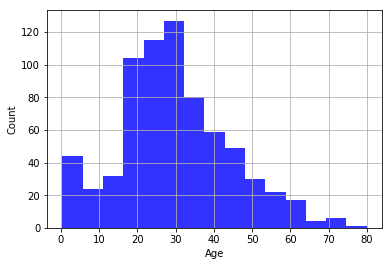

In [59]:
age_graph = titanic_train_df["Age"].hist(bins=15, color='blue', alpha=0.8)
age_graph.set(xlabel='Age', ylabel='Count')
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [60]:
Age_median=titanic_train_df["Age"].median(skipna=True)
Age_median

28.0

In [61]:
titanic_train_df["Age"].fillna(28, inplace=True)

To Check if the missing values have been filled with the '28', isnull is implemented as below:

In [62]:
titanic_train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see in the above output, Age is not showing any number for null values

Now to fill the values for Embarked, the below graph shows the overall values of 'Embarked' from the data frame:

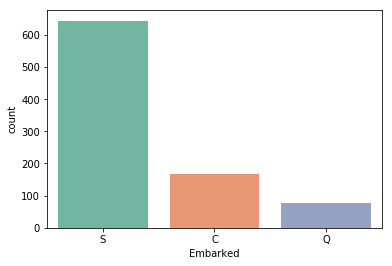

In [63]:
sns.countplot(x='Embarked',data=titanic_train_df,palette='Set2')
plt.show()

Reference for above graph using Seaborn lib- https://seaborn.pydata.org/generated/seaborn.countplot.html
It clearly shows the 'S'(Southhampton) is the most boarded place from. So,'S' is filled in place of two missing values as follows:


In [64]:
titanic_train_df["Embarked"].fillna("S", inplace=True)

To check if the above field has been filled and we can see the only field left is cabin, which we can drop or ignore. For this analysis it is dropped.

In [65]:
titanic_train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [66]:
titanic_train_df.drop('Cabin', axis=1, inplace=True)

Below is the clean data frame-

In [67]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [68]:
titanic_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to the data dictionary provided by Kaggle, both SibSp and Parch relate to traveling with family. For simplicity's sake  these two fields can be combined into one showing whether or not that individual was traveling alone.

In [69]:
titanic_train_df['TravelwithFam']=titanic_train_df["SibSp"]+titanic_train_df["Parch"]
titanic_train_df['TravelAlone']=np.where(titanic_train_df['TravelwithFam']>0, 0, 1)

In [70]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelwithFam,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In the above data frame summary, new columns created can be seen with values 1 or 0. Where 0 as if travelled with either SibSp or Parch and 1 for travelling alone in TravelAlone column. Coulmns Sibsp,Parch and TravelwithFam is not needed so those can be dropped as below:


In [71]:
titanic_train_df.drop('SibSp', axis=1, inplace=True)
titanic_train_df.drop('Parch', axis=1, inplace=True)
titanic_train_df.drop('TravelwithFam', axis=1, inplace=True)

In [72]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


Visually analyzing of attributes: Age, Sex, Pclass, TravelAlone
To draw the bar graph for different attributes, below function is created to reduce redundancy of statements.

In [76]:
def bar_graph(attribute):
    survived = titanic_train_df[titanic_train_df['Survived']==1][attribute].value_counts()
    did_not_survived = titanic_train_df[titanic_train_df['Survived']==0][attribute].value_counts()
    df = pd.DataFrame([survived,did_not_survived])
    df.index = ['Survived','Did_not_survived']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

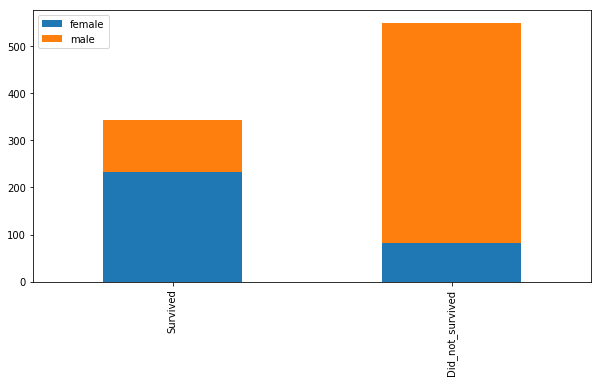

In [77]:
bar_graph('Sex')

The above graph clearly shows female were more likely survived than males.

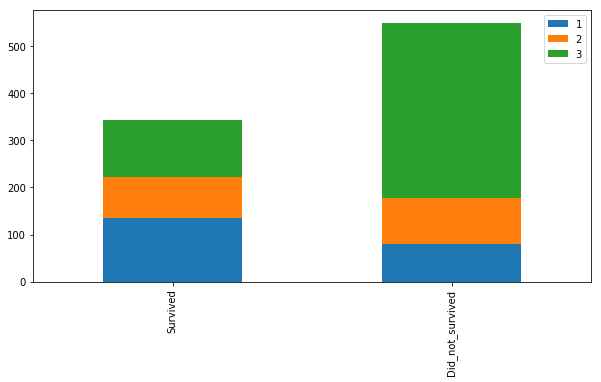

In [78]:
bar_graph('Pclass')

The above graph shows the one who survived were majority from first class and did not survive bar shows that third class passengers were the majority who did not survive. Perhaps, while rescuing the first class were given more priority.

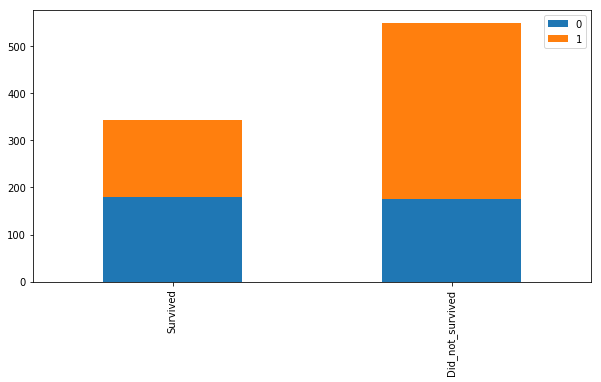

In [79]:
bar_graph('TravelAlone')

The above graph represents the 'TravelAlone' and clearly can see majority is who travelled alone did not survive.

Looking at the age of the survived and correlation between them:

In [82]:
survivals_age = titanic_train_df.loc[titanic_train_df['Survived'] == 1]['Age']

[Text(0,0.5,'# of Passengers'), Text(0.5,0,'Age')]

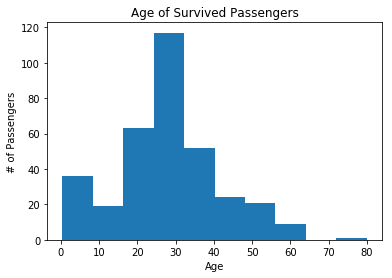

In [83]:
survivals_age.plot(kind='hist', title='Age of Survived Passengers').set(ylabel = "# of Passengers", xlabel = "Age")

The average age for survivor is about 28 years. With the most survivors having age between 20 and 40 years. 

In [84]:
titanic_train_df[['Survived','Age']].corr()

,Survived,Age
Survived,1.00000,-0.06491
Age,-0.06491,1.00000


Correlation coefficient is negative which means there might be a negative correlation between age and survival (the higher the age the lower the chance of survival). However, the absolute value of the coefficient is very low so there is little to no correlation between age and survival.

To see the percentage of people from each class of survived.

In [88]:
print ((titanic_train_df.groupby('Pclass')['Survived'].sum() / titanic_train_df.groupby('Pclass')['PassengerId'].count())*100)

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


About 63% of passengers who belonged to the 1st class survived, 47% who belonged to thr 2nd class, and 24% for the 3rd class. 

Now if we see the correlation between the  passenger class and survived.

In [85]:
titanic_train_df[['Survived','Pclass']].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


Correlation coefficient is negative which means there might be a negative correlation between class and survival.The first class passenger is more likey to survive then the thrid class. The absolute value of the coefficient suggests that there is correlation, though it is not very high.

# Conclusion-
 1.  In this analysis, it is discovered that the passengers from first class and females were more likely to survive. To get that result, comparison of different data attributes is performed against the 'survived'. So, we can say ‘Survived' was our dependent variable. Also, by visualizing the age of survived helped understanding the most likely survived people were from 20-40, more the age less of the chances of survival.Tried to analyse correlation of 'Age' & 'Pclass' with Survived
 2. The attributes used were Age, Sex, Pclass, SipSp and Parch.All these were used to comapare against who survived or not. I tried to explain above where ever these were implemented.
 3.The new attribute ‘TravelAlone’ and ‘TravelwithFam’ were created by combining the SipSp and Parch. SipSp, Parch and TravelwithFam were dropped because TravelAlone was created from these to simplify the data for analysis. Also,Cabin was excluded from the analysis as looking at the datadict above, it was missing lot of values. Secondly, looking at unique number it reflects that many people were sharing cabins.So, it would not have been ideal to include it into analysis.
 4.Age and Emabarked were filled with missing values. Medean was used to fill the missing age and Emabarked was filled with most boarded place 'S'
 